# Author : Sneha M

# Data Science & Business Analytics Internship

# Task 2 : From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

# Prediction using Unsupervised  Machine Learning 

# Unsupervised learning is a type of machine learning algorithm used to draw inferences from datasets consisting of input data without labeled responses. The most common unsupervised learning method is cluster analysis, which is used for exploratory data analysis to find hidden patterns or grouping in data.

# Step 1 : Importing the dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
# checking missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#Frequency distribution of species
iris_outcome = pd.crosstab(index=df["Species"],columns="count")      # Name the count column

iris_outcome

col_0,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


# Step 2 : Data Visualisation

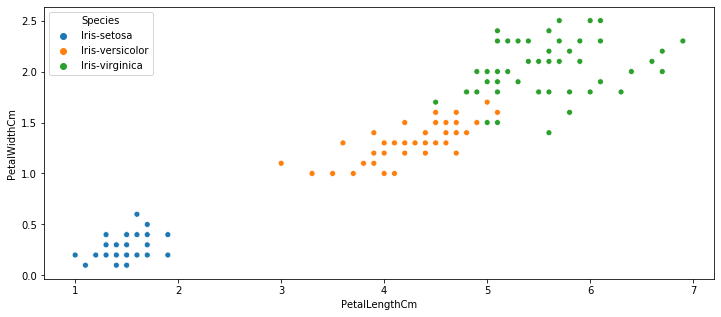

In [12]:
#numeric v/s numeric v/s categorical
plt.figure(figsize=(12,5))
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm',hue='Species',data=df)
plt.show()
#scatterplot is used for numerical not in categorical

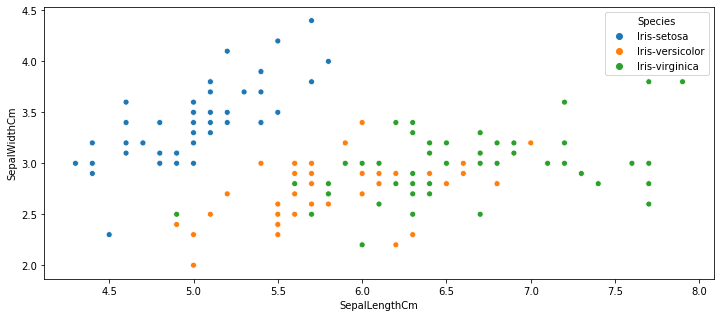

In [13]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',hue='Species',data=df)

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


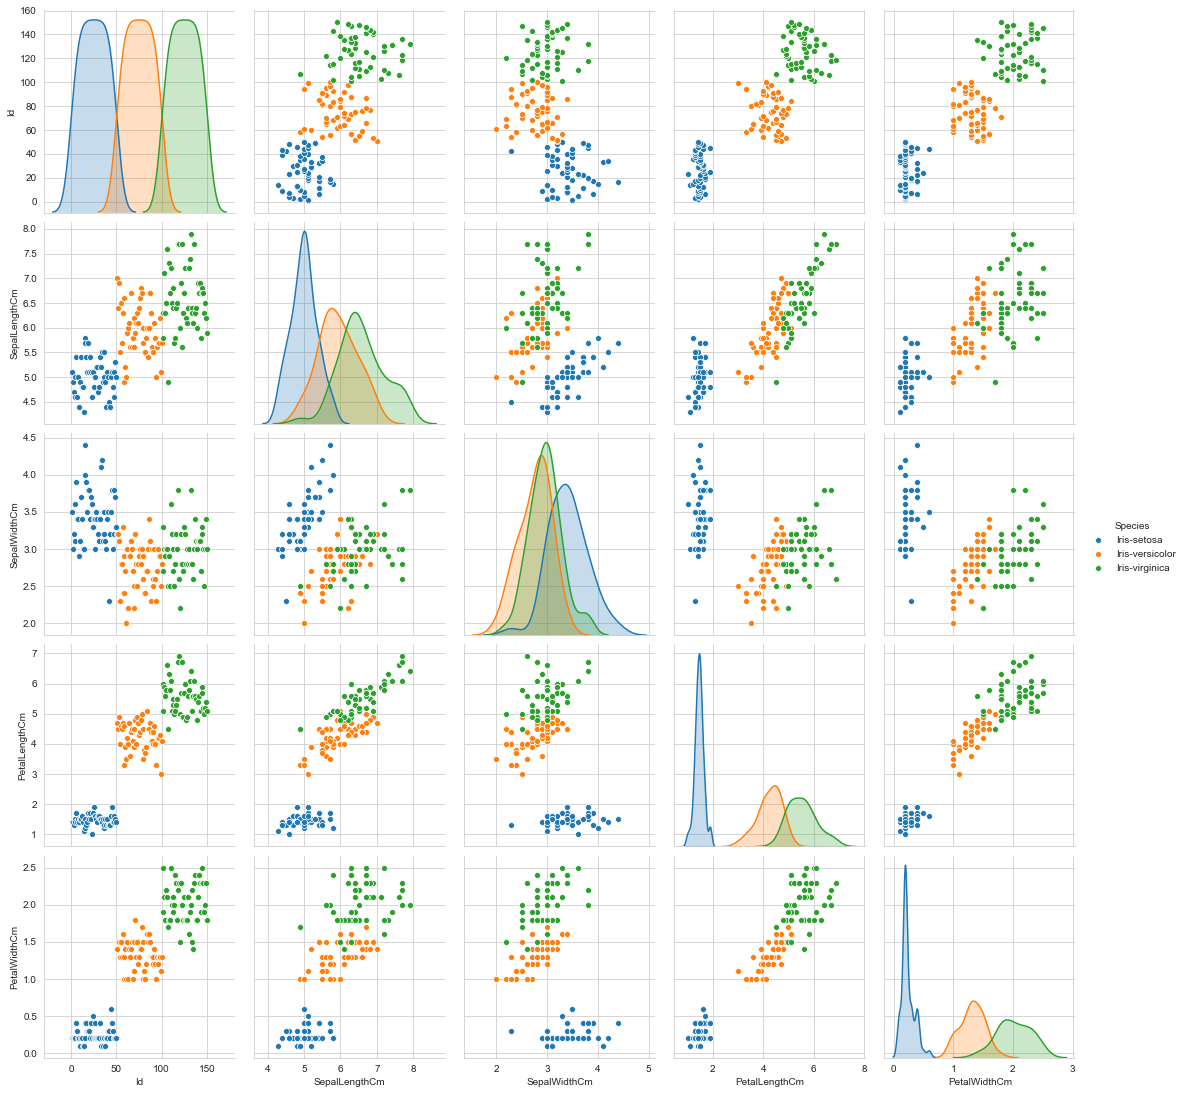

In [16]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="Species",size=3);
plt.show()


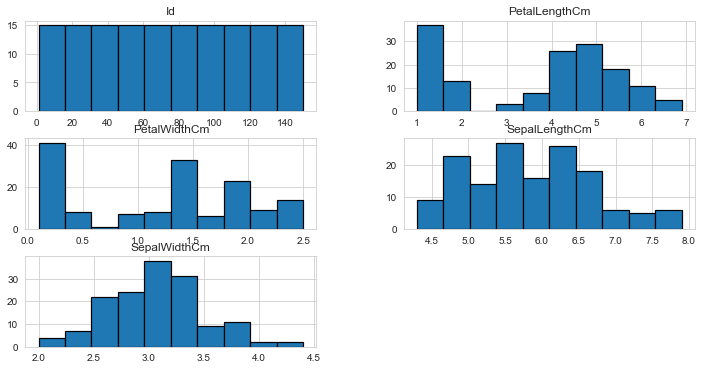

In [17]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

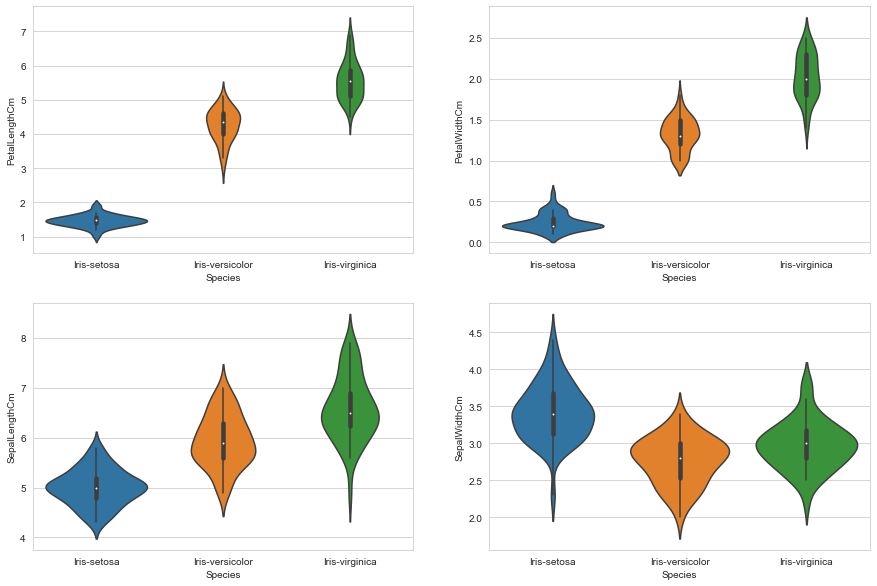

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

# K Means Clustering 
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. ... In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.

In [20]:
x = df.iloc[:, [0, 1, 2, 3]].values
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    #i above is between 1-10 numbers. init parameter is the random #initialization method  
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
#the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.
    
    kmeans.fit(x) #kmeans algorithm fits to the X dataset

    wcss.append(kmeans.inertia_) #kmeans inertia_ attribute is:  Sum of squared distances of samples #to their closest cluster center.

# Using the elbow method to determine the optimal number of clusters for k-means clustering

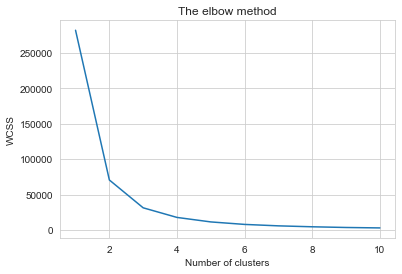

In [21]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()


#The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

# Step 4 : Implementing K-Means Clustering

In [24]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

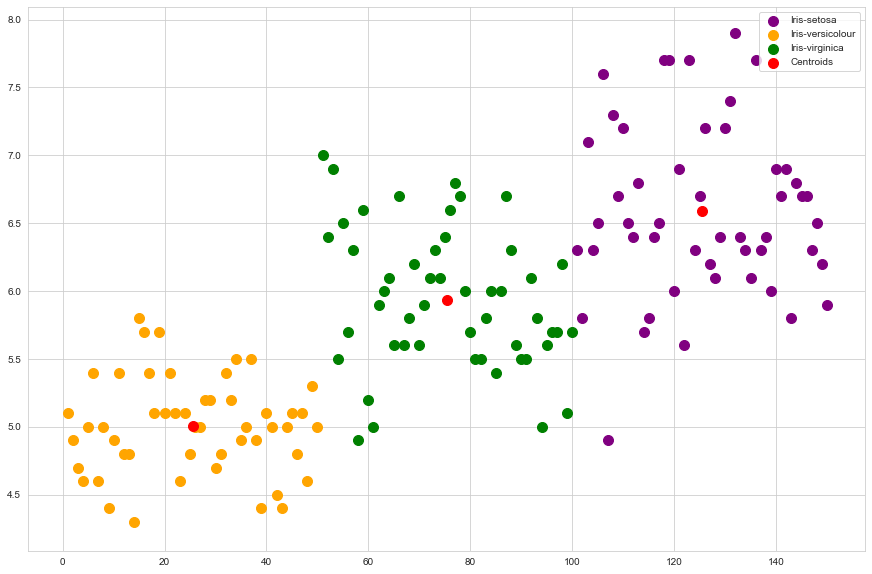

In [25]:
#Visualising the clusters
plt.figure(figsize=(15,10))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

# Correlation


Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

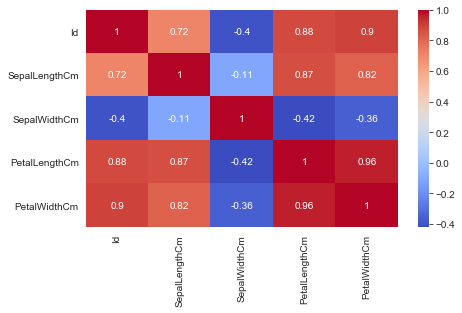

In [26]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='coolwarm') 
#draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()


The Sepal Width and Sepal Length are not correlated The Petal Width and Petal Length are highly correlated

# Step 5 : Prediction

In [27]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
prediction=km.fit_predict(x)
prediction

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [29]:
df['predicted']=prediction
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,1
146,147,6.3,2.5,5.0,1.9,Iris-virginica,1
147,148,6.5,3.0,5.2,2.0,Iris-virginica,1
148,149,6.2,3.4,5.4,2.3,Iris-virginica,1


Here the predicted clusters are shown with the output but to compare these values we will later transform them into their respective class name. But first to check the accuracy of the prediction value we will use confusion matrix.

In [30]:
centroids=km.cluster_centers_
centroids

array([[ 74.5       ,   5.922     ,   2.78      ,   4.206     ],
       [125.        ,   6.57058824,   2.97058824,   5.52352941],
       [ 25.        ,   5.00612245,   3.42040816,   1.46530612]])

In [32]:
data=df.copy()
data["Species"]=data["Species"].map({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2}).astype(int)
data['predicted']=prediction
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted
0,1,5.1,3.5,1.4,0.2,1,2
1,2,4.9,3.0,1.4,0.2,1,2
2,3,4.7,3.2,1.3,0.2,1,2
3,4,4.6,3.1,1.5,0.2,1,2
4,5,5.0,3.6,1.4,0.2,1,2
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2,1
146,147,6.3,2.5,5.0,1.9,2,1
147,148,6.5,3.0,5.2,2.0,2,1
148,149,6.2,3.4,5.4,2.3,2,1


# Above the class name are converted to respective integer value (i.e 0-''Iris-versicolor'',1-'Iris-setosa',2-'Iris-virginica') to check the confusion matrix

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data['Species'],prediction)

array([[49,  1,  0],
       [ 1,  0, 49],
       [ 0, 50,  0]], dtype=int64)

From the confusion matrix we can see that out of all 50 data of class Iris-versicolor 48 are correctly predicted whereas 2 are wrongly predicted as Iris-virginica. For 50 data of Iris-setosa all are wcorrectly predicted. And for 50 data of Iris-virginica 36 are correctly predicted whereas 14 are wrongly predicted as Iris-versicolor.

In [34]:
df['predicted']=prediction
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted
0,1,5.1,3.5,1.4,0.2,Iris-setosa,2
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,2


In [35]:
df["predicted"]=df["predicted"].map({0:'Iris-versicolor',1:'Iris-setosa',2:'Iris-virginica'})
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-virginica
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-virginica
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-virginica
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-virginica
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-virginica
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica,Iris-setosa
148,149,6.2,3.4,5.4,2.3,Iris-virginica,Iris-setosa


In [36]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,predicted
145,146,6.7,3.0,5.2,2.3,Iris-virginica,Iris-setosa
146,147,6.3,2.5,5.0,1.9,Iris-virginica,Iris-setosa
147,148,6.5,3.0,5.2,2.0,Iris-virginica,Iris-setosa
148,149,6.2,3.4,5.4,2.3,Iris-virginica,Iris-setosa
149,150,5.9,3.0,5.1,1.8,Iris-virginica,Iris-setosa


# THANK YOU !